# Problem 2.1
## (a)

Discrete Fourier Transform (DFT) is formulized in Eq. (2.18) as 

\begin{equation}
    X\big(k\big) = \sum_{n=0}^{N-1}x(n)e^{-\frac{j2\pi kn}{N}}
\end{equation}

We are asked to convert the above function to

\begin{equation}
    X\big(k\big) = W\big(k, n\big)x\big(n\big)
\end{equation}

which represents DFT in matrix form. Then, we can express the DFT vector as follows

\begin{equation}
    X\big(k\big) = 
    \begin{bmatrix}
        \vdots & \vdots & \vdots & \vdots & \vdots \\
        1 & e^{\frac{j2\pi}{N}} & e^{\frac{j4\pi}{N}} & \cdots & e^{\frac{j2\pi (N-1)}{N}} \\
        1 & 1 & 1 & \cdots & 1 \\
        1 & e^{-\frac{j2\pi}{N}} & e^{-\frac{j4\pi}{N}} & \cdots & e^{-\frac{j2\pi (N-1)}{N}} \\
        \vdots & \vdots & \vdots & \vdots & \vdots \\
        1 & e^{-\frac{j2\pi k}{N}} & e^{-\frac{j4\pi k}{N}} & \cdots & e^{-\frac{j2\pi k(N-1)}{N}} \\
        \vdots & \vdots & \vdots & \vdots & \vdots
    \end{bmatrix}_{\big(\alpha \times N\big)}\begin{bmatrix}
                                                 x(0) \\
                                                 x(1) \\
                                                 x(2) \\
                                                 \vdots \\
                                                 x(N-1) \\
                                              \end{bmatrix}_{\big(N \times 1\big)}
\end{equation}

where $\alpha$ is how many entry of $k$ you have. Let us check if the $W$ matrix we assigned is true or not using the below snippet.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Random x(n) vector whose length is N
N = 10
x = np.random.uniform(low = -1, high = 1, size = (N,))

# W matrix if length of k equals to length of x
W = np.zeros((N, N), dtype = 'complex_')
for k in range(0, N) :
    for n in range(0, N) :
        W[k, n] = np.exp((-(1j * 2 * np.pi * k * n) / N), dtype = "complex_")

In [3]:
# Numpy FFT and our DFT for comparison purpose
npFFT = np.fft.fft(x)
ourDFT = W @ x

C:\Users\cengi\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\ma\core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
C:\Users\cengi\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


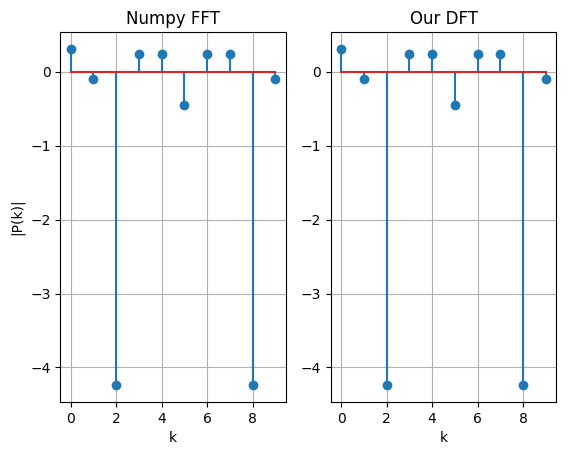

In [4]:
# Draw both of them
plt.figure(1)
plt.subplot(121)
plt.stem(np.arange(N), npFFT)
plt.title("Numpy FFT")
plt.xlabel("k")
plt.ylabel("|P(k)|")
plt.grid(visible = True)
plt.subplot(122)
plt.stem(np.arange(N), ourDFT)
plt.title("Our DFT")
plt.xlabel("k")
plt.grid(visible = True)

## (b)

If $A$ is a square matrix of full rank, then there exists a unique matrix $A^{-1}$, called the inverse of $A$. <br>
(page 28)

In [5]:
print("Rank of W               : " + str(np.linalg.matrix_rank(W)))
print("Row Number of W         : " + str(W.shape[0]))
print("Column Number of W      : " + str(W.shape[1]))
print("Is it symmetric?        : " + str(np.allclose(W, W.T, rtol = 1e-04, atol = 1e-08)))
print("Is it Hermitian matrix? : " + str(np.allclose(W, W.conj().T, rtol = 1e-04, atol = 1e-08)))

Rank of W               : 10
Row Number of W         : 10
Column Number of W      : 10
Is it symmetric?        : True
Is it Hermitian matrix? : False


1. $W$ is a square matrix.
2. Rank of $W$ is equal to its row number as well as its column number. That's why, $W$ is said to be of full-rank.
3. $W$ has linearly independent rows and columns because of above property.
4. It is also invertible.
5. $W$ is symmetric matrix because of $W = W^T$.

## (c)

We can state square linearly independent any matrix as

\begin{equation}
    A = V\wedge V^{-1}
\end{equation}

where V contains eigenvectors of $A$ in each columns and $\wedge$ contains eigenvalues of $A$ on diagonal. The inverse of this representation can be given as

\begin{equation}
    A = (V^T)^{-1}\wedge^{-1}V^{-1}
\end{equation}

as specified in page 45.

In [6]:
# Find eigenvalues and eigenvectors
eigVal, eigVec = np.linalg.eig(W)

In [7]:
# Resresent W as eigenvalue decomposition (A)
A = eigVec @ np.diag(eigVal) @ np.linalg.inv(eigVec)
    
# Is representation true?
print("Is the representation true? : " + str(np.allclose(W, A, rtol = 1e-05, atol = 1e-08)))

Is the representation true? : True


In [8]:
# Inverse W
invW = np.linalg.inv(eigVec.T) @ np.linalg.inv(np.diag(eigVal)) @ eigVec.T

# Inverse W using numpy built in function for comparison purpose
print("Are inverse results true? : " + str(np.allclose(np.linalg.inv(W), invW, rtol = 1e-04, atol = 1e-08)))

Are inverse results true? : True
